In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal   

In [ ]:
#Reading the dataset using pandas
df_full = pd.read_csv("/content/gdrive/MyDrive/changeDataset.csv")
#Here data features given numpy arrays given and vehicle types as targets,
#Prior to the changeDataset,csv , trainDataset.csv is given and optimal features are calculated 
#once the optimal features are calculated , optimal featured dataset is selected and fed into FCM


In [ ]:
# Removing the unneccessary column from the dataset

dfi=res

dfi=dfi.drop(dfi.columns[0],axis=1)
print(dfi.head(),dfi.shape)

          2         3         8  ...      2045      2046  targets
0  0.598072  0.288582  0.386307  ...  0.352187  0.357510        0
1  0.464581  0.857353  0.141329  ...  0.369844  0.216509        9
2  0.680772  0.127945  0.209687  ...  0.224066  0.464417        0
3  0.625845  0.381838  0.182923  ...  0.051118  0.432334        3
4  0.284435  0.431537  0.452026  ...  0.186153  0.590379        3

[5 rows x 1009 columns] (45438, 1009)


In [ ]:
#seperating the targets and features to fed into FCM
df_full=dfi
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

In [ ]:
print(df.head())
print(len(class_labels))


          2         3         8  ...      2044      2045      2046
0  0.598072  0.288582  0.386307  ...  0.454295  0.352187  0.357510
1  0.464581  0.857353  0.141329  ...  0.317883  0.369844  0.216509
2  0.680772  0.127945  0.209687  ...  0.353905  0.224066  0.464417
3  0.625845  0.381838  0.182923  ...  0.526417  0.051118  0.432334
4  0.284435  0.431537  0.452026  ...  0.493002  0.186153  0.590379

[5 rows x 1008 columns]
45438


In [ ]:
#Hyper parameters
# Number of Clusters
k = 11
# Maximum number of iterations
MAX_ITER = 10
# Number of data points
n = len(df)
# Fuzzy parameter
m = 1.7 #Select a value greater than 1 else it will be knn

In [ ]:
def initializeMembershipMatrix(): # initializing the membership matrix
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        
        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0
        
        membership_mat.append(temp_list)
    return membership_mat

In [ ]:
membership_mat = initializeMembershipMatrix()

In [ ]:
def calculateClusterCenter(membership_mat): # calculating the cluster center
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        print(j)
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [ ]:
#cluster_centers = calculateClusterCenter(membership_mat)
calculateClusterCenter(membership_mat)

0
1
2
3
4
5
6
7
8
9
10


[[0.4895462442999019,
  0.41200025489822106,
  0.4480674165518781,
  0.4264846929535565,
  0.3754865339972835,
  0.5429047629997535,
  0.5485919735476776,
  0.40295525604594923,
  0.3967720596684792,
  0.47423937697208646,
  0.4132375274752961,
  0.5131729955610177,
  0.40359473270157986,
  0.45896623889303323,
  0.3940615711432815,
  0.4220637558213932,
  0.7163687949246544,
  0.44411810552816366,
  0.3586031200884382,
  0.44243127050642306,
  0.519777085344367,
  0.329948625951582,
  0.514325947858942,
  0.4221334159668965,
  0.4314597764377478,
  0.5658807231605715,
  0.4294864170610176,
  0.7759678938722834,
  0.5020801898740124,
  0.39860322149802363,
  0.4795366772131929,
  0.4284077959654156,
  0.3448188816277178,
  0.43747657547999,
  0.5032965488762343,
  0.41992269209253935,
  0.4847655723260877,
  0.4304031338003955,
  0.6294740152628469,
  0.5198140245479264,
  0.5474843341566208,
  0.4586333476079537,
  0.4558439895328555,
  0.37996411779421996,
  0.5840471213962448,
  0.5

In [ ]:
#Here Accuracy is calculated by dividing the labels nearly equal chunks and finding max membership value.
#each data point can represent to the one cluster which is done in for loop and returning the accuracy.
def accuracy(cluster_labels, class_labels):
    correct_pred = 0
    #print(cluster_labels)
    l0 = max(set(labels[0:4000]), key=labels[0:4000].count)
    l1 = max(set(labels[4000:8000]), key=labels[4000:8000].count)
    l2 = max(set(labels[8000:12000]), key=labels[8000:12000].count)
    l3 = max(set(labels[12000:16000]), key=labels[12000:16000].count)
    l4 = max(set(labels[16000:20000]), key=labels[16000:20000].count)
    l5 = max(set(labels[20000:24000]), key=labels[20000:24000].count)
    l6 = max(set(labels[24000:28000]), key=labels[24000:28000].count)
    l7 = max(set(labels[28000:32000]), key=labels[28000:32000].count)
    l8 = max(set(labels[32000:36000]), key=labels[32000:36000].count)
    l9 = max(set(labels[36000:40000]), key=labels[36000:40000].count)
    l10 = max(set(labels[40000:]), key=labels[40000:].count)
    for i in range(len(df)):
        if cluster_labels[i] == l0 and class_labels[i] == 0:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == l1 and class_labels[i] == 1 and l1!=l0:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == l2 and class_labels[i] == 2 and l2!=l0 and l2!=l1:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == l3 and class_labels[i] == 3 and l3!=l0 and l3!=l1 and l3!=l2:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == l4 and class_labels[i] == 4 and l4!=l0 and l4!=l1 and l4!=l2 and l4!=l3:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == l5 and class_labels[i] == 5 and l5!=l0 and l5!=l1 and l5!=l2 and l5!=l3 and l5!=l4 :
            correct_pred = correct_pred + 1
        if cluster_labels[i] == l6 and class_labels[i] == 6 and l6!=l0 and l6!=l1 and l6!=l5 and l6!=l2 and l6!=l3 and l6!=l4:
            correct_pred = correct_pred + 1    
        if cluster_labels[i] == l7 and class_labels[i] == 7 and l7!=l0 and l7!=l1 and l7!=l5 and l7!=l2 and l7!=l3 and l7!=l4 and l7!=l6:
            correct_pred = correct_pred + 1    
        if cluster_labels[i] == l8 and class_labels[i] == 8 and l8!=l0 and l8!=l1 and l8!=l2 and l8!=l3 and l8!=l4 and l8!=l5 and l8!=l6 and l8!=l7:
            correct_pred = correct_pred + 1    
        if cluster_labels[i] == l9 and class_labels[i] == 9 and l9!=l0 and l9!=l1 and l9!=l2 and l9!=l3 and l9!=l4 and l9!=l5 and l9!=l6 and l9!=l7 and l9!=l8:
            correct_pred = correct_pred + 1    
        if cluster_labels[i] == l10 and class_labels[i] == 10 and l10!=l0 and l10!=l1 and l10!=l2 and l10!=l3 and l10!=l4 and l10!=l5 and l10!=l6 and l10!=l7 and l10!=l8 and l10!=l9:
            correct_pred = correct_pred + 1    

    accuracy = (correct_pred/len(df))*100
    return accuracy

In [ ]:
def updateMembershipValue(membership_mat, cluster_centers): # Updating the membership value
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

In [ ]:
def getClusters(membership_mat): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

In [ ]:
def fuzzyCMeansClustering(): #cluster centers are at Random vectors from data
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        
        acc.append(cluster_labels)
        
        if(curr == 0):
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    #return cluster_labels, cluster_centers
    return cluster_labels, cluster_centers, acc

In [ ]:
labels, centers, acc = fuzzyCMeansClustering()


0
1
2
3
4
5
6
7
8
9
10
Cluster Centers:
[[0.48116502 0.40974852 0.45050784 ... 0.42956721 0.32888735 0.4550042 ]
 [0.48447313 0.40977452 0.44321659 ... 0.42508329 0.32768106 0.45770331]
 [0.48082797 0.40991461 0.44560482 ... 0.42900965 0.33268443 0.45447146]
 ...
 [0.48322843 0.41579862 0.44908422 ... 0.42694716 0.33053798 0.45802504]
 [0.48495672 0.41488985 0.44682032 ... 0.43115342 0.3295175  0.45538772]
 [0.48330268 0.41182277 0.44405843 ... 0.42677763 0.32834249 0.45739407]]
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
---------------------------
Partition matrix:
[[0.09090909 0.09090909 0.09090909 ... 0.09090909 0.09090909 0.09090909]
 [0.09090908 0.09090909 0.0909091  ... 0.09090909 0.09090909 0.09090909]
 [0.0909091  0.09090909 0.09090909 ... 0.09090909 0.09090909 0.09090909]
 ...
 [0.09090909 0.09090909 0.09090909 ... 

In [ ]:
#Accuracy calculation
a = accuracy(labels, class_labels)

In [ ]:
print(a)
#10.746511730269818

12.703023900699856


In [ ]:
acc_lis = [] 
for i in range(0,len(acc)):
    val = accuracy(acc[i], class_labels)
    acc_lis.append(val)

In [ ]:
acc_lis = np.array(acc_lis) #calculating accuracy and std deviation 100 times
print("mean=",np.mean(acc_lis))
print("Std dev=",np.std(acc_lis))

mean= 9.242704344381355
Std dev= 2.074436408941401


In [ ]:
print("Cluster center vectors:") #final cluster centers
print(np.array(centers))

Cluster center vectors:
[[0.37307209 0.54817349 0.48332165 ... 0.32955933 0.45685834 0.33516681]
 [0.37307209 0.5481735  0.48332165 ... 0.32955933 0.45685834 0.33516681]
 [0.37307208 0.54817347 0.48332165 ... 0.32955932 0.45685834 0.3351668 ]
 ...
 [0.3730721  0.54817351 0.48332166 ... 0.32955933 0.45685833 0.33516682]
 [0.37307206 0.54817342 0.48332164 ... 0.3295593  0.45685835 0.33516678]
 [0.37307208 0.54817347 0.48332165 ... 0.32955932 0.45685834 0.3351668 ]]


Text(0.5, 1.0, 'Actual Labels from dataset')

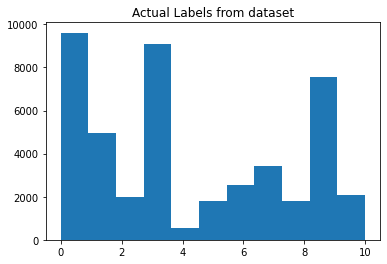

In [ ]:
import matplotlib.pyplot as plt

plt.hist(class_labels,bins=11)
plt.title("Actual Labels from dataset")

Text(0.5, 1.0, 'Predicted Labels from FCM')

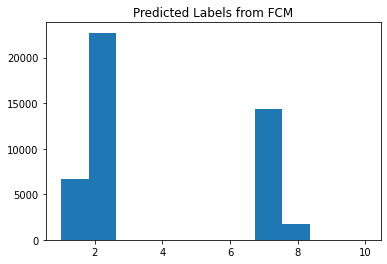

In [ ]:
plt.hist(labels,bins=11)
plt.title("Predicted Labels from FCM")

In [ ]:
data_copy=df_full.copy()
data_copy.shape

(45438, 2049)

In [ ]:
X = df_full.iloc[:, :-1].values

In [ ]:
data_copy.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249','250','251','252','253','254','255','256','257','258','259','260','261','262','263','264','265','266','267','268','269','270','271','272','273','274','275','276','277','278','279','280','281','282','283','284','285','286','287','288','289','290','291','292','293','294','295','296','297','298','299','300','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','319','320','321','322','323','324','325','326','327','328','329','330','331','332','333','334','335','336','337','338','339','340','341','342','343','344','345','346','347','348','349','350','351','352','353','354','355','356','357','358','359','360','361','362','363','364','365','366','367','368','369','370','371','372','373','374','375','376','377','378','379','380','381','382','383','384','385','386','387','388','389','390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','491','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','551','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','611','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','630','631','632','633','634','635','636','637','638','639','640','641','642','643','644','645','646','647','648','649','650','651','652','653','654','655','656','657','658','659','660','661','662','663','664','665','666','667','668','669','670','671','672','673','674','675','676','677','678','679','680','681','682','683','684','685','686','687','688','689','690','691','692','693','694','695','696','697','698','699','700','701','702','703','704','705','706','707','708','709','710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739','740','741','742','743','744','745','746','747','748','749','750','751','752','753','754','755','756','757','758','759','760','761','762','763','764','765','766','767','768','769','770','771','772','773','774','775','776','777','778','779','780','781','782','783','784','785','786','787','788','789','790','791','792','793','794','795','796','797','798','799','800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','831','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','926','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999','1000','1001','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013','1014','1015','1016','1017','1018','1019','1020','1021','1022','1023','1024','1025','1026','1027','1028','1029','1030','1031','1032','1033','1034','1035','1036','1037','1038','1039','1040','1041','1042','1043','1044','1045','1046','1047','1048','1049','1050','1051','1052','1053','1054','1055','1056','1057','1058','1059','1060','1061','1062','1063','1064','1065','1066','1067','1068','1069','1070','1071','1072','1073','1074','1075','1076','1077','1078','1079','1080','1081','1082','1083','1084','1085','1086','1087','1088','1089','1090','1091','1092','1093','1094','1095','1096','1097','1098','1099','1100','1101','1102','1103','1104','1105','1106','1107','1108','1109','1110','1111','1112','1113','1114','1115','1116','1117','1118','1119','1120','1121','1122','1123','1124','1125','1126','1127','1128','1129','1130','1131','1132','1133','1134','1135','1136','1137','1138','1139','1140','1141','1142','1143','1144','1145','1146','1147','1148','1149','1150','1151','1152','1153','1154','1155','1156','1157','1158','1159','1160','1161','1162','1163','1164','1165','1166','1167','1168','1169','1170','1171','1172','1173','1174','1175','1176','1177','1178','1179','1180','1181','1182','1183','1184','1185','1186','1187','1188','1189','1190','1191','1192','1193','1194','1195','1196','1197','1198','1199','1200','1201','1202','1203','1204','1205','1206','1207','1208','1209','1210','1211','1212','1213','1214','1215','1216','1217','1218','1219','1220','1221','1222','1223','1224','1225','1226','1227','1228','1229','1230','1231','1232','1233','1234','1235','1236','1237','1238','1239','1240','1241','1242','1243','1244','1245','1246','1247','1248','1249','1250','1251','1252','1253','1254','1255','1256','1257','1258','1259','1260','1261','1262','1263','1264','1265','1266','1267','1268','1269','1270','1271','1272','1273','1274','1275','1276','1277','1278','1279','1280','1281','1282','1283','1284','1285','1286','1287','1288','1289','1290','1291','1292','1293','1294','1295','1296','1297','1298','1299','1300','1301','1302','1303','1304','1305','1306','1307','1308','1309','1310','1311','1312','1313','1314','1315','1316','1317','1318','1319','1320','1321','1322','1323','1324','1325','1326','1327','1328','1329','1330','1331','1332','1333','1334','1335','1336','1337','1338','1339','1340','1341','1342','1343','1344','1345','1346','1347','1348','1349','1350','1351','1352','1353','1354','1355','1356','1357','1358','1359','1360','1361','1362','1363','1364','1365','1366','1367','1368','1369','1370','1371','1372','1373','1374','1375','1376','1377','1378','1379','1380','1381','1382','1383','1384','1385','1386','1387','1388','1389','1390','1391','1392','1393','1394','1395','1396','1397','1398','1399','1400','1401','1402','1403','1404','1405','1406','1407','1408','1409','1410','1411','1412','1413','1414','1415','1416','1417','1418','1419','1420','1421','1422','1423','1424','1425','1426','1427','1428','1429','1430','1431','1432','1433','1434','1435','1436','1437','1438','1439','1440','1441','1442','1443','1444','1445','1446','1447','1448','1449','1450','1451','1452','1453','1454','1455','1456','1457','1458','1459','1460','1461','1462','1463','1464','1465','1466','1467','1468','1469','1470','1471','1472','1473','1474','1475','1476','1477','1478','1479','1480','1481','1482','1483','1484','1485','1486','1487','1488','1489','1490','1491','1492','1493','1494','1495','1496','1497','1498','1499','1500','1501','1502','1503','1504','1505','1506','1507','1508','1509','1510','1511','1512','1513','1514','1515','1516','1517','1518','1519','1520','1521','1522','1523','1524','1525','1526','1527','1528','1529','1530','1531','1532','1533','1534','1535','1536','1537','1538','1539','1540','1541','1542','1543','1544','1545','1546','1547','1548','1549','1550','1551','1552','1553','1554','1555','1556','1557','1558','1559','1560','1561','1562','1563','1564','1565','1566','1567','1568','1569','1570','1571','1572','1573','1574','1575','1576','1577','1578','1579','1580','1581','1582','1583','1584','1585','1586','1587','1588','1589','1590','1591','1592','1593','1594','1595','1596','1597','1598','1599','1600','1601','1602','1603','1604','1605','1606','1607','1608','1609','1610','1611','1612','1613','1614','1615','1616','1617','1618','1619','1620','1621','1622','1623','1624','1625','1626','1627','1628','1629','1630','1631','1632','1633','1634','1635','1636','1637','1638','1639','1640','1641','1642','1643','1644','1645','1646','1647','1648','1649','1650','1651','1652','1653','1654','1655','1656','1657','1658','1659','1660','1661','1662','1663','1664','1665','1666','1667','1668','1669','1670','1671','1672','1673','1674','1675','1676','1677','1678','1679','1680','1681','1682','1683','1684','1685','1686','1687','1688','1689','1690','1691','1692','1693','1694','1695','1696','1697','1698','1699','1700','1701','1702','1703','1704','1705','1706','1707','1708','1709','1710','1711','1712','1713','1714','1715','1716','1717','1718','1719','1720','1721','1722','1723','1724','1725','1726','1727','1728','1729','1730','1731','1732','1733','1734','1735','1736','1737','1738','1739','1740','1741','1742','1743','1744','1745','1746','1747','1748','1749','1750','1751','1752','1753','1754','1755','1756','1757','1758','1759','1760','1761','1762','1763','1764','1765','1766','1767','1768','1769','1770','1771','1772','1773','1774','1775','1776','1777','1778','1779','1780','1781','1782','1783','1784','1785','1786','1787','1788','1789','1790','1791','1792','1793','1794','1795','1796','1797','1798','1799','1800','1801','1802','1803','1804','1805','1806','1807','1808','1809','1810','1811','1812','1813','1814','1815','1816','1817','1818','1819','1820','1821','1822','1823','1824','1825','1826','1827','1828','1829','1830','1831','1832','1833','1834','1835','1836','1837','1838','1839','1840','1841','1842','1843','1844','1845','1846','1847','1848','1849','1850','1851','1852','1853','1854','1855','1856','1857','1858','1859','1860','1861','1862','1863','1864','1865','1866','1867','1868','1869','1870','1871','1872','1873','1874','1875','1876','1877','1878','1879','1880','1881','1882','1883','1884','1885','1886','1887','1888','1889','1890','1891','1892','1893','1894','1895','1896','1897','1898','1899','1900','1901','1902','1903','1904','1905','1906','1907','1908','1909','1910','1911','1912','1913','1914','1915','1916','1917','1918','1919','1920','1921','1922','1923','1924','1925','1926','1927','1928','1929','1930','1931','1932','1933','1934','1935','1936','1937','1938','1939','1940','1941','1942','1943','1944','1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040','2041','2042','2043','2044','2045','2046','2047','targets']

In [ ]:
target = 'targets'
feature_list = [i for i in data_copy.columns if i not in target]

In [ ]:
import math
from sklearn.metrics import silhouette_samples, silhouette_score
def F(X, y):
    return silhouette_score(X, labels)

def get_fitness(data, feature_list, target, pop):
    fitness = []
    for i in range(pop.shape[0]):
        cols = []
        for j in range(pop.shape[1]):
            if pop[i, j] == 1:
                cols.append(feature_list[j])
        fitness.append(F(data[cols], data[target]))
    return fitness

def flip(pop):
    return np.max(pop) - pop

def select(pop): #first step 
    temp = pop.copy()
    for i in range(pop.shape[0]):
        temp[i] = pop[np.random.randint(0, pop.shape[0])]
    return temp

def crossover(pop):#for crossover calculation
    n = np.random.randint(1, pop.shape[1])
    row = pop.shape[0]
    col = pop.shape[1]
    for i in range(0, row, 2):
        pop[i] = np.append(pop[i][0:n], pop[i+1][n:col])
        pop[i+1] = np.append(pop[i+1][0:n], pop[i][n:col])     
    return pop

def population_initialization(pop_size, num_col):#population creation
    pop = []
    random_list = np.random.rand(pop_size, num_col)-0.5
    for i in random_list:
        temp = []
        for j in i:
            temp.append(math.ceil(j))
        pop.append(temp)
    memory = np.zeros((2, num_col))-1
    return np.array(pop), memory

In [ ]:
def ga(data, feature_list, target, n, max_iter): #Genetic algorithm
    c = len(feature_list)
    population, memory = population_initialization(n, c)    
    fitness = get_fitness(data, feature_list, target, population)
    optimal_value = np.max(fitness)
    optimal_solution = population[np.where(fitness == optimal_value)][0]    
    
    for i in range(max_iter):  
        print(i)             
        population = select(population)
        population = crossover(population)                        
        if np.random.rand() < 0.3:
            population = flip(population)        
        fitness = get_fitness(data, feature_list, target, population)
        if np.max(fitness) > optimal_value:
            optimal_value = np.max(fitness)
            optimal_solution = population[np.where(fitness == optimal_value)][0]                               
        
    return optimal_solution, optimal_value

In [ ]:
data=df_full
feature_set, acc_score = ga(data, feature_list, target, 10, 2)
# Filter Selected Features
feature_set = [feature_list[j] for j in range(len(feature_list)) if feature_set[j]==1]
# Print List of Features
print('Optimal Feature Set\n', feature_set,'\nOptimal Silhouette Score =', acc_score*100, '%')

0
1
Optimal Feature Set
 ['2', '3', '8', '9', '11', '12', '16', '18', '19', '21', '23', '25', '27', '28', '29', '32', '34', '37', '38', '40', '41', '44', '45', '48', '55', '62', '63', '65', '70', '71', '72', '73', '75', '76', '77', '78', '79', '81', '85', '87', '89', '92', '93', '94', '95', '96', '99', '101', '102', '104', '106', '107', '109', '112', '113', '115', '116', '119', '122', '123', '124', '125', '129', '132', '133', '135', '136', '138', '139', '141', '142', '143', '144', '146', '147', '149', '154', '155', '156', '160', '161', '165', '166', '169', '171', '175', '177', '178', '180', '182', '185', '186', '189', '191', '193', '195', '197', '198', '199', '200', '202', '203', '204', '205', '208', '210', '212', '215', '217', '218', '219', '220', '221', '222', '223', '225', '231', '232', '233', '234', '235', '237', '239', '240', '242', '243', '245', '247', '249', '253', '254', '255', '256', '258', '259', '260', '263', '267', '270', '271', '273', '274', '275', '277', '278', '279', '28

In [ ]:
len(feature_set)

1008

In [ ]:
teData=completeData.copy()

In [ ]:
teData=teData[feature_set]

In [ ]:
teData.to_csv("/content/gdrive/MyDrive/changeDataset.csv")

In [ ]:
#Reference 
#https://medium.com/analytics-vidhya/feature-selection-using-genetic-algorithm-20078be41d16